In [33]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data_T0 = pd.read_csv("QueryResults.csv")
print(data_T0.shape)
data_T0["Body"] = data_T0["Body"].str.strip("<p>").str.strip("</p>")


(30000, 8)


In [35]:
# Select our tags, represented as strings, and transform them into arrays of tags
tags = data_T0["Tags"]
clean_tags = tags.str.split("><").apply(
    lambda x: [a.strip("<").strip(">") for a in x])

# Use pandas' get_dummies to get dummy values 
# select only tags that appear over 500 times
tag_columns = pd.get_dummies(clean_tags.apply(pd.Series).stack()).groupby(level=0).sum()
all_tags = tag_columns.copy().astype(bool).sum(axis=0).sort_values(ascending=False)
top_tags = all_tags[all_tags > 50000//20]
top_tag_columns = tag_columns[top_tags.index]

data_T1 = pd.concat([data_T0, top_tag_columns], axis=1)
data_T1.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CreationDate,android,google-cloud-platform,python
0,Randomized QuickSort IndexOutOfBounds exception,this is the QuickSort Randomized that I've com...,<java><random><quicksort><indexoutofboundsexce...,68940699,1,52,1,2021-08-26 14:45:15,0,0,0
1,Conditional rendering between 3 page component...,I want to know if conditional rendering betwee...,<reactjs><react-router><conditional-statements...,68940832,2,154,1,2021-08-26 14:52:08,0,0,0
2,terraform create k8s secret from gcp secret,I have managed to achieve the flow of creating...,<google-cloud-platform><terraform><kubernetes-...,68941378,0,1867,1,2021-08-26 15:28:42,0,1,0
3,test the id shouldnt be in response body,hey guys im new in postman</p>\n<p>this is my ...,<javascript><automation><postman><postman-coll...,68942267,0,491,3,2021-08-26 16:29:53,0,0,0
4,Generate DID in ION SIDETREE testnet,I have succeeded deploy the ION SIDETREE testn...,<blockchain><bitcoind><decentralized-applicati...,68943483,1,282,1,2021-08-26 18:10:41,0,0,0


In [36]:
from sklearn import model_selection
data_Train, data_Test = model_selection.train_test_split(data_T1,random_state=0)

sample_size = 30000
data_T = data_T1.sample(sample_size)
data_T.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CreationDate,android,google-cloud-platform,python
18800,Error to compile ios project with kotlin multi...,I have implemented kotlin multiplatform in an ...,<xcode><kotlin><build.gradle><kotlin-multiplat...,66148218,1,1334,1,2021-02-11 03:08:09,0,0,0
29028,How to handle NULL Value in BigQuery while wri...,I am ingesting data from one Database to BigQu...,<google-cloud-platform><google-bigquery><googl...,75120819,1,588,1,2023-01-14 19:52:15,0,1,0
22705,modify user-agent with decarativeNetRequest an...,"Am trying to migrate a toggle to manifest V3, ...",<google-chrome><google-chrome-extension><chrom...,73361588,2,1599,2,2022-08-15 13:18:34,0,0,0
25383,Compiler optimizations may cause integer overf...,"I have an <code>int x</code>. For simplicity, ...",<c++><compiler-optimization><undefined-behavio...,74102654,64,7918,4,2022-10-17 20:05:15,0,0,0
17948,High Level DR Drill Steps for a PostgreSql clu...,I'd like to have some advice on the steps I ha...,<postgresql><cluster-analysis><database-restor...,72339352,0,623,1,2022-05-22 16:23:52,0,0,0


In [37]:
#data_T["Tags-clean"] = data_T["Tags"].str.split("><").apply(
#    lambda x: [a.strip("<").strip(">") for a in x]).apply(
#    lambda x: ["<"+a+">" for a in x]).apply(lambda x: " ".join(x))
data_T["Tags-clean"] = data_T["Tags"].str.split("><").apply(
    lambda x: [a.strip("<").strip(">") for a in x]).apply(
    lambda x: ["tag"+a+"tag" for a in x]).apply(lambda x: " ".join(x))
data_T["Tags-clean"] = data_T["Tags-clean"].str.replace('-','_').str.replace('.','_').str.replace('+','_').str.replace('#','_')
print(data_T.iloc[1]["Tags"][1:-1].rsplit("><"))
print(data_T.iloc[1]["Body"])
print(data_T.iloc[1]["Tags-clean"])

['google-cloud-platform', 'google-bigquery', 'google-cloud-dataflow', 'apache-beam']
I am ingesting data from one Database to BigQuery using the <code>JdbcIO</code> Source connector and <code>BigQueryIO</code> Sink connector provided by <code>Apache Beam</code>.</p>
<p>Below is my sample table data:</p>
<p><a href="https://i.sstatic.net/h71qN.png" rel="nofollow noreferrer"><img src="https://i.sstatic.net/h71qN.png" alt="enter image description here" /></a></p>
<p>As we can see few columns such as <code>id</code>, and <code>booking_date</code> contain NULL Value. So when I try to write data into BigQuery, it gives the below error</p>
<pre><code>&quot;message&quot;: &quot;Error while reading data, error message: JSON parsing error in row starting at position 0: Only optional fields can be set to NULL. Field: status; Value: NULL 
</code></pre>
<p>if I pass <code>null</code> in <code>booking_date</code> it gives an <code>invalid date format error</code>.</p>
<p>Below is the RowMapper I am 

In [38]:
data_T.describe()

,Id,Score,ViewCount,AnswerCount,android,google-cloud-platform,python
count,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,6.761486e+07,1.42800,1940.889000,1.364100,0.139133,0.092467,0.087333
std,4.658124e+06,4.55833,6013.516489,0.796881,0.346091,0.289688,0.282328
min,5.954940e+07,-5.00000,12.000000,1.000000,0.000000,0.000000,0.000000
25%,6.347620e+07,0.00000,352.000000,1.000000,0.000000,0.000000,0.000000
50%,6.766654e+07,1.00000,849.000000,1.000000,0.000000,0.000000,0.000000
75%,7.161324e+07,2.00000,1806.000000,2.000000,0.000000,0.000000,0.000000
max,7.557414e+07,347.00000,555403.000000,32.000000,1.000000,1.000000,1.000000


In [39]:
duplicateRows = data_T[data_T.duplicated()]
duplicateRows.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CreationDate,android,google-cloud-platform,python,Tags-clean


In [40]:
# Tokenizer
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

def bracket_exterminator(sentence):
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in sentence:
        if i == '<':
            skip1c += 1
        elif i == '>' and skip1c > 0:
            skip1c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret

def beautifulsoup(sentence):
    soup = BeautifulSoup(sentence, 'html.parser')
    return soup.get_text()

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace(' +', ' ').replace('/', ' ').replace(' #', ' ').replace('. ', ' ').replace('=', ' ').replace(':', ' ').replace("'", ' ').replace('.', ' ')
    word_tokens = word_tokenize(sentence_clean)
    #tagged = pos_tag(word_tokens)
    #print(tagged)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w1 = set(stopwords.words('english')).union({'[', ']', ',', ':', '?', '(', ')'})#, 'would', 'like','way','one','using','public','error','use','user'
stop_w = list(stop_w1)
def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

def stem_fct(list_words):
    ps = PorterStemmer()
    stem_w = [ps.stem(w) for w in list_words]
    return stem_w

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    desc_text2 = beautifulsoup(desc_text)
    word_tokens = tokenizer_fct(desc_text2)
    lw = lower_start_fct(word_tokens)
    lem_w = lemma_fct(lw)
#    stem_w = stem_fct(lem_w)
    sw = stop_word_filter_fct(lem_w)

    transf_desc_text = ' '.join(sw)
    return transf_desc_text

data_T['Text'] = data_T['Title'] #+ " " + data_T['Body']
#data_T['Text'] = data_T['Text'].apply(lambda x : bracket_exterminator(x))
data_T['sentence_bow_lem'] = data_T['Text'].apply(lambda x : transform_bow_lem_fct(x))
data_T.shape

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Travail\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Travail\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
C:\Users\Travail\AppData\Local\Temp\ipykernel_105288\746305199.py:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence, 'html.parser')


(30000, 14)

In [41]:
data_T.iloc[4]['sentence_bow_lem']

'high level dr drill step postgresql clustered setup'

In [42]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 30
documents = data_T.sentence_bow_lem
# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0,
        n_jobs = -1)

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2,max_features=2000,tokenizer=None,preprocessor=None,binary=False,lowercase=False,stop_words="english")
tf = tf_vectorizer.fit_transform(documents)

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=30, n_jobs=-1,
                          random_state=0)

In [43]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [44]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
tf_feature_names = tf_vectorizer.get_feature_names_out()
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)


Topic 0:
output python make process input end multiprocessing speech proxy regression
Topic 1:
extension version method identity chrome save check deploy context convert
Topic 2:
react navigation native compose component jetpack button android screen tab
Topic 3:
script path running wa correct password mode called rail async
Topic 4:
azure service graph token api microsoft access account request authentication
Topic 5:
class multi expected layer label kera shape implementation valueerror classification
Topic 6:
spring kafka stream table boot connect cloud snowflake batch directory
Topic 7:
mock pipe response user foreach replacement subject write pushing directly
Topic 8:
type template docker string build container result problem parameter function
Topic 9:
fails adding load command plugin html bug webpage matlab org
Topic 10:
django rest pas url key number data google based framework
Topic 11:
instance cloud gcp google engine sql platform kubernetes viewmodel import
Topic 12:
pipeline

In [45]:
import pyLDAvis
from pyLDAvis import lda_model

pyLDAvis.enable_notebook()
lda_model.prepare(lda, tf, tf_vectorizer, mds='mmds')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.008273  0.171010       1        1  7.867143
4      0.298303  0.226609       2        1  6.196121
2     -0.369342 -0.013182       3        1  5.815862
10    -0.064461  0.225996       4        1  5.765854
25     0.148354  0.173775       5        1  5.719620
8      0.321810  0.041929       6        1  5.098686
6      0.073334  0.380676       7        1  5.051349
26    -0.213046  0.002928       8        1  4.632338
17    -0.339163  0.231139       9        1  4.151639
12     0.195332  0.414258      10        1  4.096193
22     0.363613  0.314356      11        1  4.083663
24    -0.186022  0.312451      12        1  3.994756
14    -0.419698  0.148518      13        1  3.923608
1     -0.045824  0.458808      14        1  3.828603
16     0.106065 -0.462792      15        1  2.802344
11    -0.258818  0.407046      16        1  2.789502
23    -0.425687 -0.237109      17        1  2.774492
21    -0.477949 -0.056199      18        1  2.598109
3      0.485563  0.072256      19        1  2.538445
28     0.385892 -0.262691      20        1  2.410815
0     -0.302103 -0.317763      21        1  1.969150
20     0.274691 -0.396120      22        1  1.774368
5      0.456395 -0.144479      23        1  1.756151
19    -0.081355 -0.478940      24        1  1.708204
9     -0.183566 -0.394640      25        1  1.475087
29     0.021392 -0.271237      26        1  1.103204
13     0.146838 -0.197030      27        1  1.080893
7      0.009464 -0.138670      28        1  1.008191
27     0.044048 -0.105587      29        1  0.992858
15     0.027666 -0.105317      30        1  0.992751, topic_info=          Term        Freq       Total Category  logprob  loglift
1338      post  305.000000  305.000000  Default  30.0000  30.0000
297     change  254.000000  254.000000  Default  29.0000  29.0000
319      class  229.000000  229.000000  Default  28.0000  28.0000
827     google  557.000000  557.000000  Default  27.0000  27.0000
975      issue  208.000000  208.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1709     stack    0.316521   62.232330  Topic30  -7.6994  -0.6688
964   internal    0.316521   36.185062  Topic30  -7.6994  -0.1266
1728     store    0.316521   53.713994  Topic30  -7.6994  -0.5216
664   evaluate    0.316521    9.501906  Topic30  -7.6994   1.2106
109      apply    0.316521   33.328892  Topic30  -7.6994  -0.0443

[1403 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0        15  0.639011       00
1        22  0.833140       04
2         2  0.946205       10
4        16  0.942075       11
5        12  0.892399       12
...     ...       ...      ...
1985     21  0.915894      wsl
1989      5  0.948471  xamarin
1990     17  0.942916      xml
1993     10  0.939312     yaml
1998      9  0.836031      zip

[1950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 5, 3, 11, 26, 9, 7, 27, 18, 13, 23, 25, 15, 2, 17, 12, 24, 22, 4, 29, 1, 21, 6, 20, 10, 30, 14, 8, 28, 16])

In [46]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

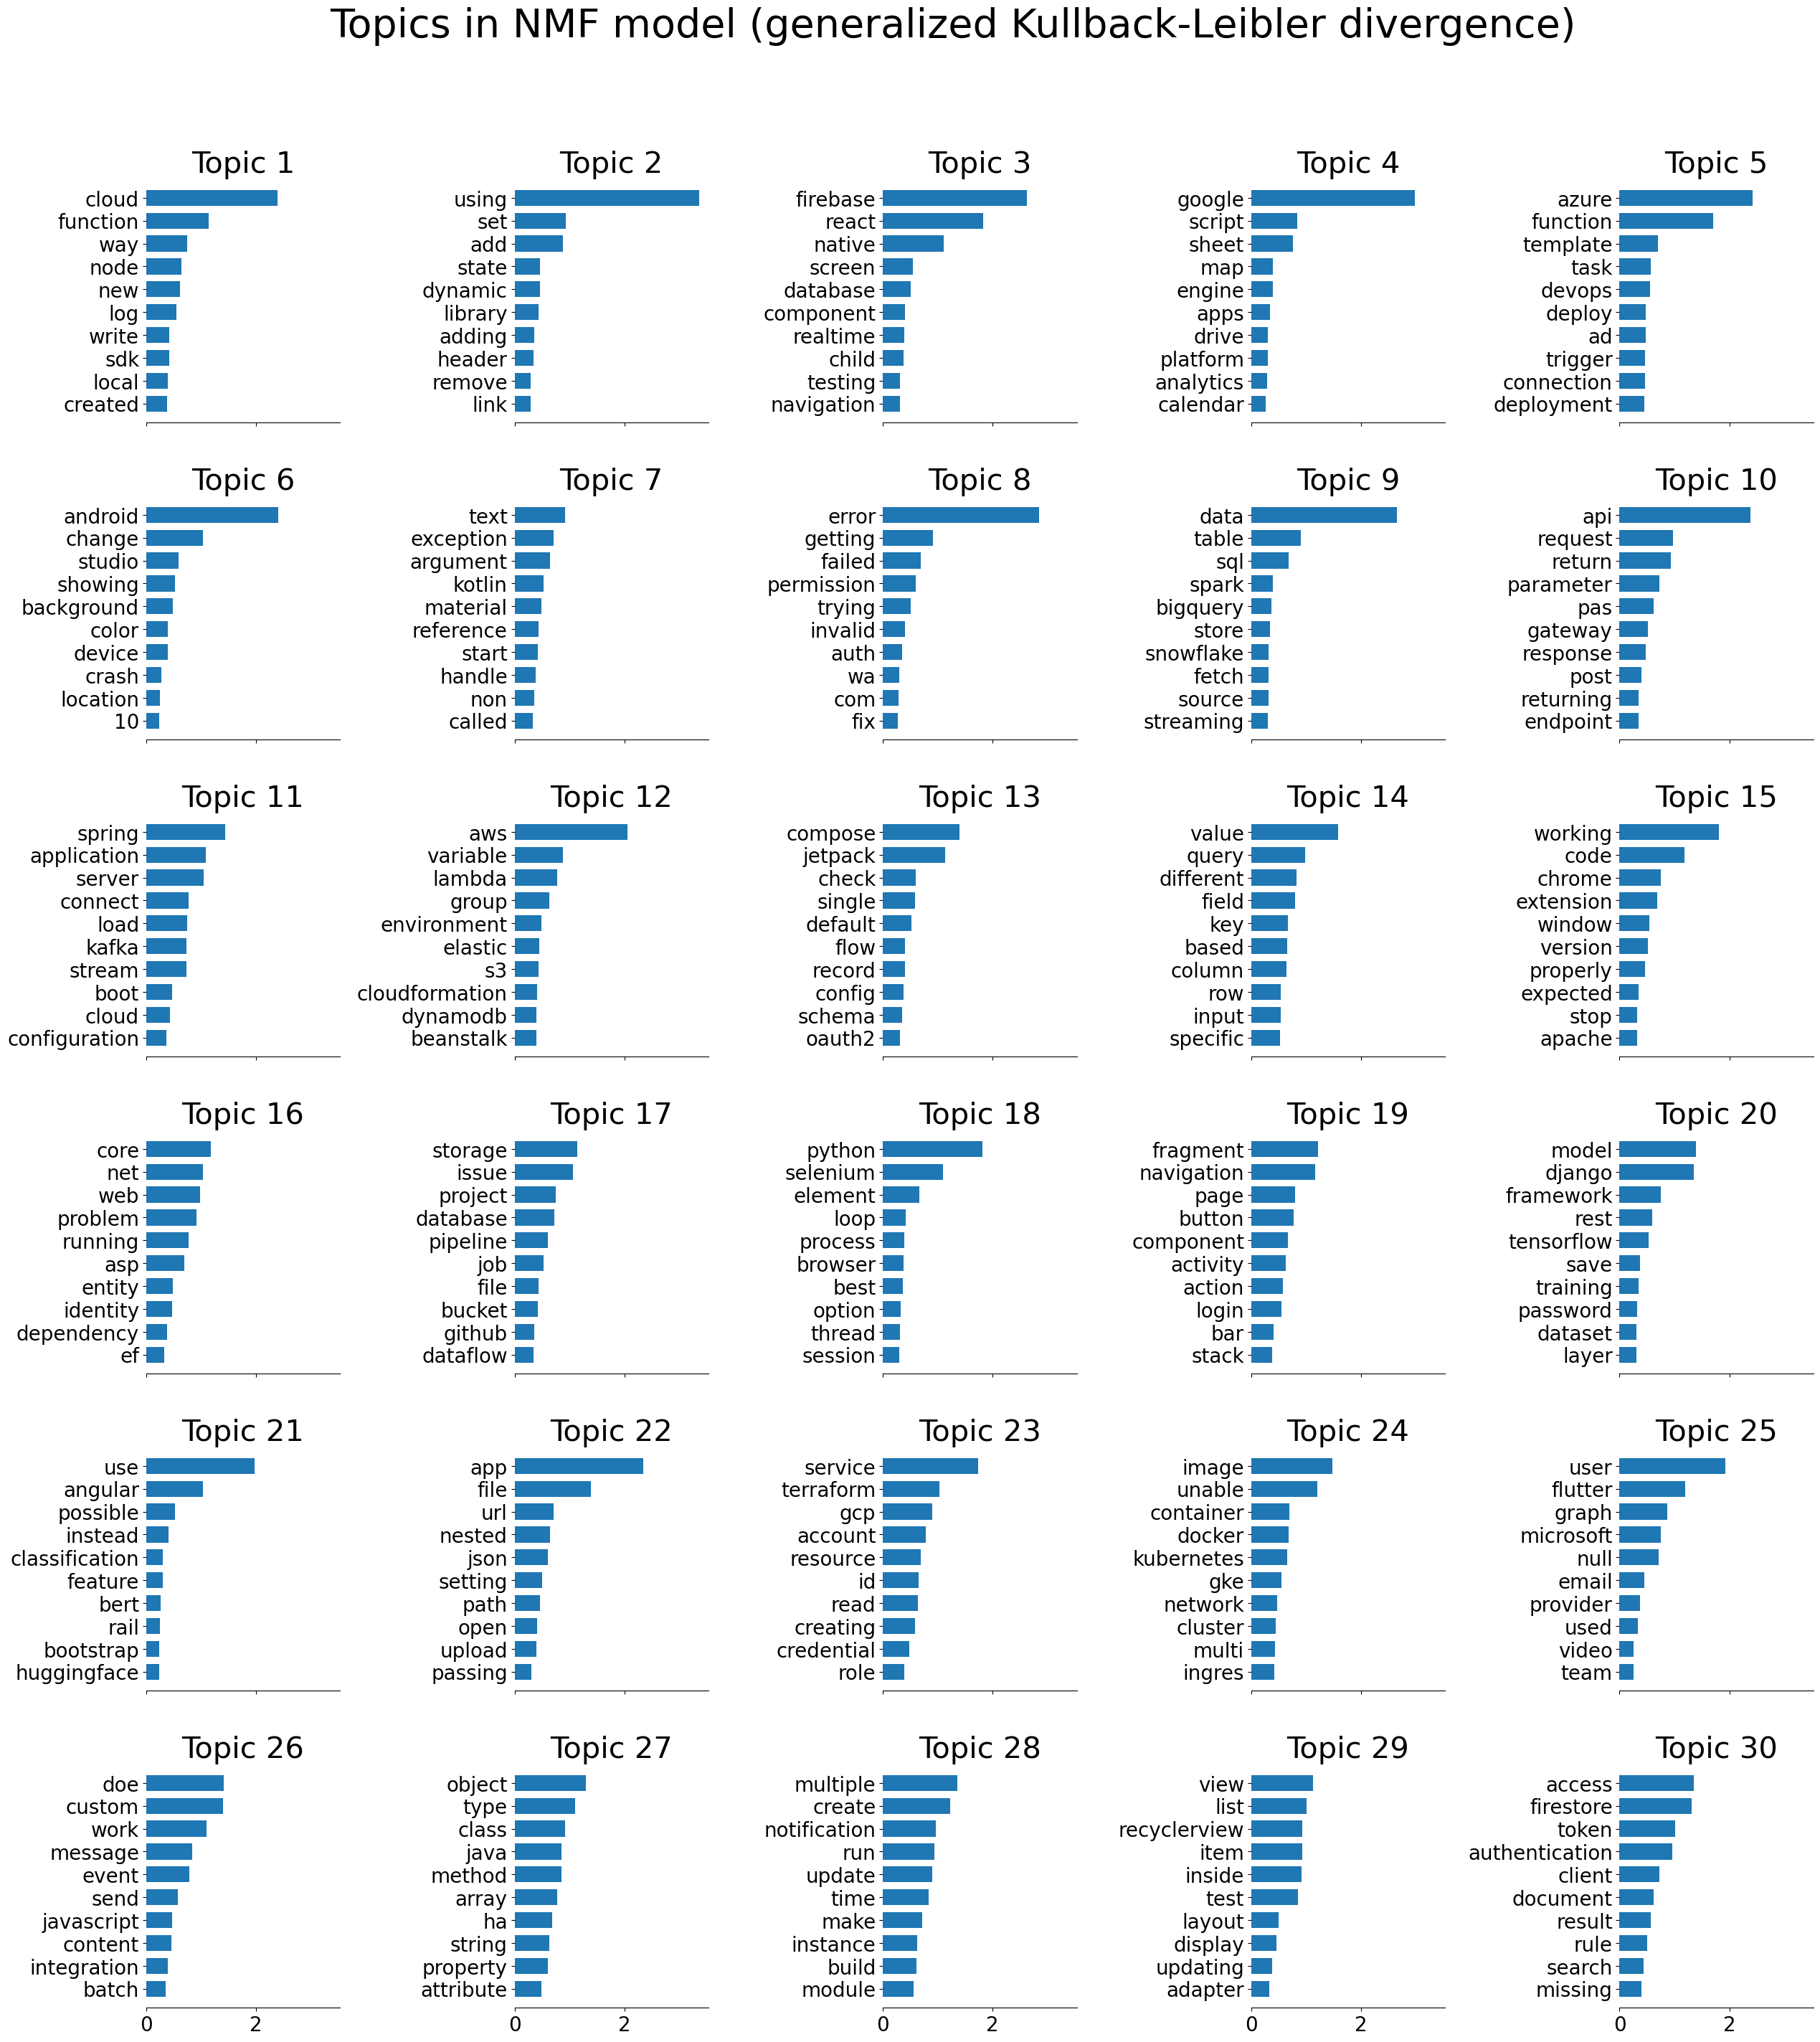

In [47]:
from sklearn.decomposition import NMF

nmf = NMF(
    n_components=n_topics,
    random_state=1,
    init="nndsvda",
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tf)

tfidf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    10,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

In [90]:
topic_names = ["cloud","using","firebase","google","azure","android","test","error","data","api","spring","aws","compose","value","working","core","storage","python","fragment","model","use","app","service","image","user","doe","object","multiple","view","access"]

In [68]:
for topic_idx, topic in enumerate(lda.components_):
    print("Topic {}:".format(topic_idx))
    print(topic)

Topic 0:
[0.03333336 0.03333336 0.03333336 ... 0.03333336 0.03333336 0.03333336]
Topic 1:
[0.03333336 0.03333335 0.03333336 ... 0.03333336 0.03333336 0.03333336]
Topic 2:
[0.03333336 0.03333336 0.03333336 ... 0.03333335 0.03333336 0.03333337]
Topic 3:
[0.03333336 0.03333336 0.03333336 ... 0.03333336 0.03333336 0.03333335]
Topic 4:
[3.33333575e-02 3.33333576e-02 3.80946491e+01 ... 3.33333577e-02
 3.33333600e-02 1.32896440e+01]
Topic 5:
[0.03333336 0.03333336 0.03333336 ... 0.03333336 0.03333336 0.03333336]
Topic 6:
[0.03333336 0.03333335 0.03333337 ... 0.03333336 0.03333336 0.03333335]
Topic 7:
[0.03333336 0.03333335 0.03333336 ... 0.03333336 0.03333336 0.03333336]
Topic 8:
[0.03333336 0.03333344 0.03333336 ... 0.03333337 0.03333336 0.03333336]
Topic 9:
[0.03333336 0.03333336 0.03333336 ... 0.03333336 0.03333336 0.03333336]
Topic 10:
[0.03333335 0.03333336 0.03333336 ... 0.03333336 0.03333336 0.03333335]
Topic 11:
[0.03333336 0.03333336 0.03333335 ... 0.03333336 0.03333335 0.03333336]
T

In [70]:
doc_topic = lda.transform(tf)

In [72]:
doc_topicnmf = nmf.transform(tf)

In [94]:
for n in range(30):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_names[topic_most_pr-1]))

doc: 0 topic: android

doc: 1 topic: using

doc: 2 topic: api

doc: 3 topic: user

doc: 4 topic: python

doc: 5 topic: app

doc: 6 topic: using

doc: 7 topic: error

doc: 8 topic: api

doc: 9 topic: user

doc: 10 topic: python

doc: 11 topic: spring

doc: 12 topic: android

doc: 13 topic: storage

doc: 14 topic: google

doc: 15 topic: google

doc: 16 topic: user

doc: 17 topic: api

doc: 18 topic: doe

doc: 19 topic: user

doc: 20 topic: app

doc: 21 topic: image

doc: 22 topic: image

doc: 23 topic: app

doc: 24 topic: doe

doc: 25 topic: error

doc: 26 topic: api

doc: 27 topic: user

doc: 28 topic: user

doc: 29 topic: spring

